## Estadística Aplicada

2do parcial

Oscar Gabriel Martínez Rodríguez 1962702

Grupo 43

In [137]:
## cargar librerías necesarias para este notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [138]:
## librerias específicas
from lifelines import ExponentialFitter
from lifelines import WeibullFitter
from lifelines import LogNormalFitter
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test
from lifelines import CoxPHFitter
import seaborn as sns

In [139]:
## cargar los datos
data = pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/credit_risk.csv')
data.head(5)

,saldo_cuenta,meses,historia_crediticia,uso,cantidad,saldo_cuenta_ahorro,años_trabajando,tasa_de_interes,genero_estado_civil,aval,...,activos,edad,planes_de_pago,casa,numero_creditos,situacion_laboral,dependientes_economicos,telefono,extranjero,credito_pagado
0,menor_a_cero,6,no_ha_pagado,TV,1169,NaN,mas_de_7,4,hombre_soltero,NaN,...,bienes_raices,67,NaN,propia,2,gobierno,1,1,1,1
1,cero_a_200,48,pago_algun_credito,TV,5951,menor_100,1_a_4,2,mujer_no_soltera,NaN,...,bienes_raices,22,NaN,propia,1,gobierno,1,0,1,0
2,sin_cuenta,12,no_ha_pagado,colegiaturas,2096,menor_100,4_a_7,2,hombre_soltero,NaN,...,bienes_raices,49,NaN,propia,1,obrero,2,0,1,1
3,menor_a_cero,42,pago_algun_credito,mobiliario,7882,menor_100,4_a_7,2,hombre_soltero,aval,...,seguro_vida,45,NaN,prestada,1,gobierno,2,0,1,1
4,menor_a_cero,24,pago_retrasado,coche_nuevo,4870,menor_100,1_a_4,3,hombre_soltero,NaN,...,sin_activos,53,NaN,prestada,2,gobierno,2,0,1,0


In [140]:
data.dtypes

saldo_cuenta               object
meses                       int64
historia_crediticia        object
uso                        object
cantidad                    int64
saldo_cuenta_ahorro        object
años_trabajando            object
tasa_de_interes             int64
genero_estado_civil        object
aval                       object
años_actual_domicilio       int64
activos                    object
edad                        int64
planes_de_pago             object
casa                       object
numero_creditos             int64
situacion_laboral          object
dependientes_economicos     int64
telefono                    int64
extranjero                  int64
credito_pagado              int64
dtype: object

**crédito pagado** -> '1' si el cliente ha pagado completamente el préstamo, '0' si no lo ha hecho o aún no termina de pagar.

**meses** -> tiempo en meses que lleva pagar completamente el préstamo.

**cantidad** -> monto del préstamo otorgado en euros.

### Análisis exploratorio

Cuántas variables y cuántas observaciones tienen la base

In [141]:
data.shape

(1000, 21)

En la base hay 21 variables y 1000 observaciones.

Cuál es el monto promedio de los créditos otorgados por el banco.

In [142]:
data['cantidad'].mean().round(2)

3271.26

El monto promedio es de 3271.26 euros.

Cuál es el tiempo promedio que se tardaron en pagar el préstamo los que pagaron el préstamo en su totalidad.

In [143]:
data1 = data.groupby('credito_pagado')[['meses']].mean().round(2)
data1

,meses
credito_pagado,
0,24.86
1,19.21


Quienes ya pagaron su préstamo en su totalidad (1) tardaron 19.21 meses.

Cuál es la tasa de interés promedio otorgada por el banco.

In [144]:
data['tasa_de_interes'].mean().round(3)

2.973

La tasa de interés promedio otorgada es de 2.973%.

Cuál es el monto promedio y la tasa de interés promedio de los que ya pagaron.

In [145]:
data2 = data.groupby('credito_pagado')[['cantidad', 'tasa_de_interes']].mean().round(2)
data2

,cantidad,tasa_de_interes
credito_pagado,,
0,3938.13,3.10
1,2985.46,2.92


El monto promedio de los que ya pagaron es de 2985.46 euros, con una tasa de interés promedio de 2.90%.

Cuál es el monto promedio y la tasa de interés promedio de los que no han pagado.

Con el mismo output anterior, se tiene que el monto promedio de los que no han pagado es de 3939.13 euros, con una tasa de interés promedio de 3.10%.

### Estime un modelo de Kaplan-Meier

Utilizando las variables de 'meses' y de 'credito_pagado' se crea el modelo de Kaplan-Meier

In [146]:
km1 = KaplanMeierFitter().fit(data['meses'], data['credito_pagado'])

a) Cuál es la mediana del tiempo y qué significa

In [147]:
km1.median_survival_time_

24.0

La mediana del tiempo es de 24 meses, indica que la mitad de los créditos son pagados en este tiempo.

b) ¿Es mayor/menor que el tiempo promedio del inciso 1c?

Dado que el promedio es de 19.21 meses, la mediana del modelo es mayor que el tiempo promedio observado.

#### 3. Determine si el riesgo de que el préstamo se pague en su totalidad es constante, creciente, decreciente, o tipo log-normal respecto al tiempo.

Primero hay que determinar cuál es el mejor modelo entre el Exponencial, el de Weibull o el de LogNormal.

In [148]:
mexpo = ExponentialFitter().fit(data['meses'], data['credito_pagado'])
mweib = WeibullFitter().fit(data['meses'], data['credito_pagado'])
mlogn = LogNormalFitter().fit(data['meses'], data['credito_pagado'])

Ahora, por el criterio de AIC se determina cuál es el mejor modelo:

In [149]:
##Criterio AIC (menor  = mejor)
print(f'Exponencial: {mexpo.AIC_.round(2)}, Weibull: {mweib.AIC_.round(2)}, LogN: {mlogn.AIC_.round(2)}')

Exponencial: 6157.19, Weibull: 5900.98, LogN: 5813.75


Teniendo que el modelo LogNormal es el que mejor se ajusta para estos datos, se procede a graficar su función de riesgo.

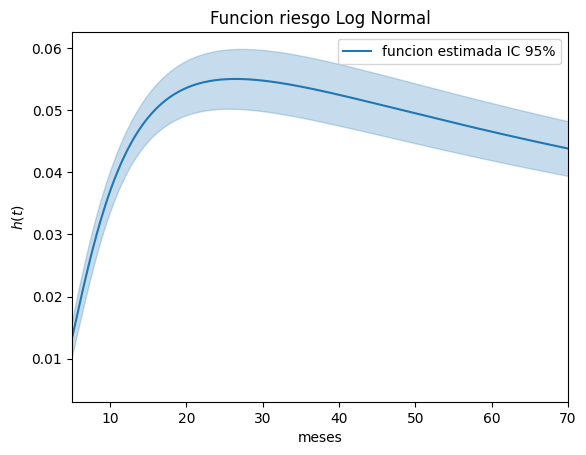

In [150]:
mlogn.plot_hazard(label = 'funcion estimada IC 95%')
plt.title('Funcion riesgo Log Normal')
plt.xlim(5, 70)
plt.xlabel('meses')
plt.ylabel('$ h(t) $')
plt.show()

La función de riesgo tiene forma de Log Normal.

### 4. Estimar un modelo de Cox para ver qué factores influyen sobre el riesgo de que el préstamo se pague en su totalidad.

a) A parte de “tasa de interes” y “cantidad”, elige otras cuatro variables que 
creas que afectan el riesgo del evento

b) Di si cada una de las 6 variables que elegiste, aumentan/disminuyen el 
riesgo del evento y por qué

c) Realiza las transformaciones adecuadas para utilizar las variables en un 
modelo de cox

d) Estima un modelo de cox con las variables elegidas e interpreta los 
coeficientes

In [151]:
## ver todas las variables disponibles
data.dtypes

saldo_cuenta               object
meses                       int64
historia_crediticia        object
uso                        object
cantidad                    int64
saldo_cuenta_ahorro        object
años_trabajando            object
tasa_de_interes             int64
genero_estado_civil        object
aval                       object
años_actual_domicilio       int64
activos                    object
edad                        int64
planes_de_pago             object
casa                       object
numero_creditos             int64
situacion_laboral          object
dependientes_economicos     int64
telefono                    int64
extranjero                  int64
credito_pagado              int64
dtype: object

Se seleccionarán las siguientes variables:
- edad
- numero_creditos
- historia_crediticia
- situacion_laboral

Estas variables podrían tener impacto en el riesgo de pagarse en su totalidad un préstamo, pues estas variables pueden apoyar o relacionarse con el nivel de solvencia económica con el que puede contar una persona.

Quedando entonces la base de datos de la siguiente forma:

In [152]:
coxdata = data[['credito_pagado','meses', 'tasa_de_interes', 'cantidad', 'edad','numero_creditos', 'historia_crediticia', 'situacion_laboral']]
coxdata.head(5)

,credito_pagado,meses,tasa_de_interes,cantidad,edad,numero_creditos,historia_crediticia,situacion_laboral
0,1,6,4,1169,67,2,no_ha_pagado,gobierno
1,0,48,2,5951,22,1,pago_algun_credito,gobierno
2,1,12,2,2096,49,1,no_ha_pagado,obrero
3,1,42,2,7882,45,1,pago_algun_credito,gobierno
4,0,24,3,4870,53,2,pago_retrasado,gobierno


In [153]:
## depuración de base de datos
# buscar missing values
coxdata.isnull().sum()

credito_pagado         0
meses                  0
tasa_de_interes        0
cantidad               0
edad                   0
numero_creditos        0
historia_crediticia    0
situacion_laboral      0
dtype: int64

In [154]:
#buscar valores duplicados
coxdata.duplicated().sum()

0

In [155]:
#tipos de variables
coxdata.dtypes

credito_pagado          int64
meses                   int64
tasa_de_interes         int64
cantidad                int64
edad                    int64
numero_creditos         int64
historia_crediticia    object
situacion_laboral      object
dtype: object

Hay que obtener dummies de las siguientes variables:

- historia_crediticia
- situacion_laboral

In [156]:
unique_hc = coxdata['historia_crediticia'].unique()
unique_hc

array(['no_ha_pagado', 'pago_algun_credito', 'pago_retrasado',
       'sin_creditos', 'pago_todos'], dtype=object)

In [157]:
dummies_hc = pd.get_dummies(coxdata['historia_crediticia'], prefix = 'hc').astype(int)
dummies_hc.head()

,hc_no_ha_pagado,hc_pago_algun_credito,hc_pago_retrasado,hc_pago_todos,hc_sin_creditos
0,1,0,0,0,0
1,0,1,0,0,0
2,1,0,0,0,0
3,0,1,0,0,0
4,0,0,1,0,0


In [158]:
#quedarse con n-1 dummies, eliminando 'hc_pago_todos'
dummies_hc = dummies_hc.drop(columns = 'hc_pago_todos')
dummies_hc.head()

,hc_no_ha_pagado,hc_pago_algun_credito,hc_pago_retrasado,hc_sin_creditos
0,1,0,0,0
1,0,1,0,0
2,1,0,0,0
3,0,1,0,0
4,0,0,1,0


In [159]:
unique_at = coxdata['situacion_laboral'].unique()
unique_at

array(['gobierno', 'obrero', 'administrativo', 'desempleado'],
      dtype=object)

In [160]:
dummies_at = pd.get_dummies(coxdata['situacion_laboral'], prefix = 'sl').astype(int)
dummies_at.head()

,sl_administrativo,sl_desempleado,sl_gobierno,sl_obrero
0,0,0,1,0
1,0,0,1,0
2,0,0,0,1
3,0,0,1,0
4,0,0,1,0


In [161]:
# quedarse con n-1 dummies, eliminando 'sl_desempleado'
dummies_at = dummies_at.drop(columns= 'sl_desempleado')
dummies_at.head()

,sl_administrativo,sl_gobierno,sl_obrero
0,0,1,0
1,0,1,0
2,0,0,1
3,0,1,0
4,0,1,0


Una vez obtenidos los dummies para estas 3 variables, se procede a eliminar estas mismas columnas del dataframe original, para después concatenar con los dummies y tenerlo en un solo dataframe.

In [162]:
coxdata = coxdata.drop(columns= ['historia_crediticia', 'situacion_laboral'])
coxdata

,credito_pagado,meses,tasa_de_interes,cantidad,edad,numero_creditos
0,1,6,4,1169,67,2
1,0,48,2,5951,22,1
2,1,12,2,2096,49,1
3,1,42,2,7882,45,1
4,0,24,3,4870,53,2
...,...,...,...,...,...,...
995,1,12,3,1736,31,1
996,1,30,4,3857,40,1
997,1,12,4,804,38,1
998,0,45,4,1845,23,1


In [163]:
coxdata = pd.concat([coxdata, dummies_hc, dummies_at], axis = 1) 
coxdata.head(5)

,credito_pagado,meses,tasa_de_interes,cantidad,edad,numero_creditos,hc_no_ha_pagado,hc_pago_algun_credito,hc_pago_retrasado,hc_sin_creditos,sl_administrativo,sl_gobierno,sl_obrero
0,1,6,4,1169,67,2,1,0,0,0,0,1,0
1,0,48,2,5951,22,1,0,1,0,0,0,1,0
2,1,12,2,2096,49,1,1,0,0,0,0,0,1
3,1,42,2,7882,45,1,0,1,0,0,0,1,0
4,0,24,3,4870,53,2,0,0,1,0,0,1,0


Una vez obtenido el dataframe con los dummies, se procede a hacer el modelo de Cox.

In [164]:
cox1 = CoxPHFitter().fit(coxdata, 'meses', 'credito_pagado')
cox1.print_summary()

<lifelines.CoxPHFitter: fitted with 1000 total observations, 300 right-censored observations>
             duration col = 'meses'
                event col = 'credito_pagado'
      baseline estimation = breslow
   number of observations = 1000
number of events observed = 700
   partial log-likelihood = -4028.69
         time fit was run = 2023-10-06 00:02:54 UTC

---
                        coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                     
tasa_de_interes        -0.45       0.64       0.04            -0.52            -0.37                 0.59                 0.69
cantidad               -0.00       1.00       0.00            -0.00            -0.00                 1.00                 1.00
edad                    0.01       1.01       0.00             0.01             0.02                 1.01                 1.02
numero_creditos         0.03       1.03       0.08            -0.13             0.19                 0.87                 1.21
hc_no_ha_pagado         1.00       2.71       0.24             0.53             1.46                 1.70                 4.31
hc_pago_algun_credito   0.62       1.85       0.23             0.17             1.06                 1.19                 2.89
hc_pago_retrasado       0.42       1.52       0.26            -0.09             0.93                 0.91                 2.55
hc_sin_creditos        -0.06       0.94       0.34            -0.74             0.61                 0.48                 1.84
sl_administrativo       0.63       1.88       0.29             0.06             1.21                 1.06                 3.34
sl_gobierno             0.38       1.46       0.28            -0.16             0.92                 0.85                 2.50
sl_obrero               0.62       1.86       0.28             0.07             1.17                 1.07                 3.22

                        cmp to      z      p   -log2(p)
covariate                                              
tasa_de_interes           0.00 -11.90 <0.005     106.03
cantidad                  0.00 -16.03 <0.005     189.77
edad                      0.00   3.71 <0.005      12.26
numero_creditos           0.00   0.35   0.72       0.47
hc_no_ha_pagado           0.00   4.21 <0.005      15.24
hc_pago_algun_credito     0.00   2.72   0.01       7.27
hc_pago_retrasado         0.00   1.61   0.11       3.22
hc_sin_creditos           0.00  -0.18   0.85       0.23
sl_administrativo         0.00   2.16   0.03       5.04
sl_gobierno               0.00   1.37   0.17       2.55
sl_obrero                 0.00   2.20   0.03       5.16
---
Concordance = 0.79
Partial AIC = 8079.38
log-likelihood ratio test = 481.39 on 11 df
-log2(p) of ll-ratio test = 317.33

In [165]:
## coeficientes sin redondear
cox1.params_

covariate
tasa_de_interes         -0.448345
cantidad                -0.000391
edad                     0.012856
numero_creditos          0.029649
hc_no_ha_pagado          0.996219
hc_pago_algun_credito    0.617541
hc_pago_retrasado        0.421646
hc_sin_creditos         -0.062864
sl_administrativo        0.632440
sl_gobierno              0.377390
sl_obrero                0.618408
Name: coef, dtype: float64

In [166]:
## exp(coef) sin redondear
cox1.hazard_ratios_

covariate
tasa_de_interes          0.638684
cantidad                 0.999609
edad                     1.012939
numero_creditos          1.030093
hc_no_ha_pagado          2.708024
hc_pago_algun_credito    1.854362
hc_pago_retrasado        1.524469
hc_sin_creditos          0.939072
sl_administrativo        1.882198
sl_gobierno              1.458473
sl_obrero                1.855970
Name: exp(coef), dtype: float64

Ahora se procede con la interpretación de las variables, para determinar si afectan al evento (que se pague el crédito), y en caso que sea así, si aumentan o disminuyen el riesgo y en qué forma.

##### Interpretación de coeficientes

Comenzando por establecer las hipótesis:

$H_o$: La variable no afecta

$H_a$: La variable tiene un efecto sobre que los empleados renuncien 

Estableciendo un valor alfa = 0.05

Las variables que no tienen algún efecto sobre que los empleados renuncien son:

- **numero_creditos** -> P-value = 0.72 > alfa = 0.05.  El número de créditos que ha solicitado no influye en el riesgo que se pague por completo el préstamo.
- **hc_pago_retrasado** -> P-value = 0.11 > alfa = 0.05.  Que el historial crediticio marque "pago retrasado" contra tenerlo en "pago_todos" no influye en el riesgo que se pague por completo el préstamo.
- **hc_sin_creditos** -> P-value = 0.85 > alfa = 0.05.  Que el historial crediticio marque "sin_creditos" contra tenerlo en "pago_todos" no influye en el riesgo que se pague por completo el préstamo.
- **sl_gobierno** -> P-value = 0.17 > alfa = 0.05.  Que la situación laboral marque "gobierno" contra estar desempleado no influye en el riesgo que se pague por completo el préstamo.

Entonces, para las variables significativas:

**tasa_de_interes** -> P-value < 0.005 < alfa = 0.05

Dado que el coef = -0.446856 < 0, una menor tasa de interés aumenta el riesgo que se pague el préstamo en su totalidad.

In [167]:
p = (1-cox1.hazard_ratios_['tasa_de_interes']).round(4)
p

0.3613

El riesgo de que el préstamo se pague en su totalidad reduce un 36.13% por cada 100pb (1%) de tasa de interés del préstamo.

**cantidad** -> P-value < 0.005 < alfa = 0.05

Dado que el coef = -0.000386 < 0, una menor cantidad prestada aumenta el riesgo que se pague el préstamo en su totalidad.

In [168]:
p = (1 - cox1.hazard_ratios_['cantidad']).round(4)
p

0.0004

El riesgo que el préstamo se pague en su totalidad reduce un 0.04% por cada Euro prestado.

**edad** -> P-value < 0.005 < alfa = 0.05

Dado que el coef = 0.012856 > 0, una mayor edad aumenta el riesgo que se pague el préstamo en su totalidad.

In [169]:
p = (cox1.hazard_ratios_['edad']-1).round(4)
p

0.0129

El riesgo que el préstamo se pague en su totalidad aumenta un 1.29% por cada año de edad del cliente.

**hc_no_ha_pagado** -> P-value < 0.005 < alfa = 0.05

Dado que el coef = 0.996219 > 0, el tener el historial crediticio como "no ha pagado" contra "pago_todos" aumenta el riesgo que el préstamo se pague en su totalidad.

In [170]:
p = (cox1.hazard_ratios_['hc_no_ha_pagado']-1).round(4)
p

1.708

El riesgo que el préstamo se pague en su totalidad aumenta un 170.8% al tener en historial crediticio "no ha pagado" contra tenerlo en "pago todos".

**hc_pago_algun_credito** -> P-value = 0.02 < alfa = 0.05

Dado que el coef = 0.617541 > 0, el tener el historial crediticio como "pagó algún crédito" contra "pago_todos" aumenta el riesgo que se pague por completo el préstamo.

In [171]:
p = (cox1.hazard_ratios_['hc_pago_algun_credito']-1).round(4)
p

0.8544

El riesgo que el préstamo se pague en su totalidad aumenta un 85.44% al tener en historial crediticio "pagó algún crédito" contra tenerlo en "pago_todos".

**sl_administrativo** -> P-value = 0.03 < alfa 0.05

Dado que el coef  = 0.632440 > 0, estar trabajando en área administrativa aumenta el riesgo de pagar el crédito en su totalidad, esto comparado a estar desempleado.

In [172]:
p = (cox1.hazard_ratios_['sl_administrativo']-1).round(4)
p

0.8822

El riesgo que el préstamo se pague en su totalidad aumenta un 88.22% al trabajar en el sector administrativo, comparado a estar desempleado.

**sl_obrero** -> P-value = 0.03 < alfa 0.05

Dado que el coef  = 0.618408 > 0, estar trabajando en área obrera aumenta el riesgo de pagar el crédito en su totalidad, esto comparado a estar desempleado.

In [173]:
p = (cox1.hazard_ratios_['sl_obrero']-1).round(4)
p

0.856

El riesgo que el préstamo se pague en su totalidad aumenta un 85.6% al trabajar en el área obrero, comparado a estar desempleado.

De todas las variables seleccionadas inicialmente, la única que no tuvo impacto sobre el evento fue el número de créditos, lo que indica que en el Banco de Ilusión no suele ser algo de medir o ver cuando alguien paga su crédito e incluso cuando se otorga uno.

### 5. Con base en los cálculos realizados, redacta un comentario integral de por lo menos 250 palabras que resuma el análisis, reflexiones y recomendaciones sobre la política de otorgamiento de créditos en el Banco de la Ilusión

El caso presentado en el Banco de la Ilusión respecto al pago de créditos otorgados permite encontrar distintos enfoques que, a pesar de ser muy diversos, da información útil.

Que entre todos los registros, el tiempo promedio de pago en su totalidad sea de 19 meses, da a entender que el crédito en promedio no está visto para ser utilizado en un largo plazo sino para alguna posible emergencia que requiera del uso de un dinero con el que no se cuenta en ese momento.  Esto también se refleja con la cantidad promedio prestada, pues es una cantidad no muy alta considerando salarios promedios mensuales de países europeos.

El haber buscado la mediana de tiempo en pagar en su totalidad el préstamo haciendo uso del modelo de Kaplan Meier respalda esto mismo, pues aunque la mediana es mayor que el promedio de toda la base de datos, sigue siendo una cantidad de meses que pudiera considerarse como no largo plazo.

Lo que la función de riesgo nos dice con el modelo mejor ajustado es que, el riesgo de que el evento suceda tiene su punto máximo entre los 20 meses de edad del crédito, y a partir de allí comienza a decrecer con mayor lentitud que respecto a un crédito "joven", eso implica que no muchos clientes comienzan a pagar hasta pasado al menos un año de haber sacado el crédito, pero una vez pasados los 20 meses es más probable que se dé el evento y que paguen el crédito.

El modelo de Cox puede proporcionar más información al involucrar más variables, más allá de únicamente el tiempo y el evento en cuestión.  Con las variables seleccionadas, el modelo regresó que factores un tanto "predecibles" como la tasa de interés y la cantidad prestada influyen de forma inversa, que a menor de ambos el riesgo de poder pagarse este préstamo en su totalidad era mayor.  La edad, en cambio, mantenía una relación directa respecto al riesgo de pagar el préstamo, lo cual puede sustentarse en una "madurez" mayor conforme las personas van creciendo, aunque no siempre es de esta forma.  Resultó curioso observar que el número de créditos que el cliente ha tenido no influye en el riesgo pues, contando otros factores como si ese número de créditos los ha pagado en su totalidad, si alguien cuenta con un número mayor de créditos en su perfil, suele ser porque su historial crediticio es bueno y, los paga.

La mejor recomendación que pudiera hacer hacia el Banco de la Ilusión es que determinen bien a qué sector de personas quieren dirigirse, y esto irá muy acorde al nivel de riesgo al que quieren estar expuestos, pues con el registro actual se tiene que las personas mayores, con una tasa de interés baja, que lleven tiempo trabajando considerable y que tengan registrado haber pagado algún crédito son las que suelen pagar en su totalidad.  Pero tomando en cuenta esto, tasas de interés bajas impiden que exista gran ganancia para el banco, una recomendación podría ser aumentar las tasas a aquellos clientes que no cumplan en su totalidad requisitos como haber trabajado varios años o haber pagado anteriormente ya otros créditos.  Clientes potenciales como los jóvenes que necesitan obtener un crédito por primera vez podrían verse interesados por estos productos, aunque las tasas sean algo más altas, pero considerando que esto puede significar en filtros más accesibles para ser aceptados en estos préstamos.